In [59]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [60]:
data = "../DataSets/teleCust1000t.csv"
df = pd.read_csv(data)

In [61]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [62]:
df.shape

(1000, 12)

In [63]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

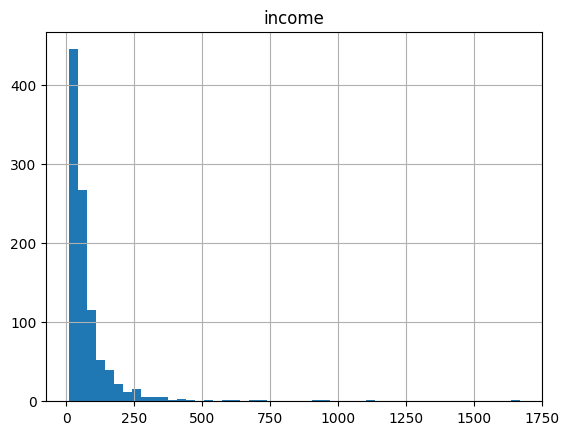

In [64]:
df.hist(column = 'income', bins = 50)

In [65]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [66]:
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values

In [67]:
x[:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [68]:
y = df['custcat'].values

In [69]:
y[:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [70]:
scaler = preprocessing.StandardScaler().fit(x)
x_scaled= scaler.transform(x)
x_scaled[:2]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158]])

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
k = 4 
k_Nearest_Neighbor = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
k_Nearest_Neighbor

KNeighborsClassifier(n_neighbors=4)

In [74]:
y_predicted = k_Nearest_Neighbor.predict(x_test)
print(y_predicted[:5], y[:5])

[3 1 3 4 4] [1 4 3 1 3]


In [75]:
from sklearn import metrics

In [76]:
print("Accuracy of train:", metrics.accuracy_score(y_train, k_Nearest_Neighbor.predict(x_train)))
print("Accuracy of test: ", metrics.accuracy_score(y_test, y_predicted))

Accuracy of train: 0.5575
Accuracy of test:  0.26


In [77]:
## Practice
#Can you build the model again, but this time with k=6?
k = 6
k_Nearest_Neighbor = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)

In [78]:
y_predicted = k_Nearest_Neighbor.predict(x_test)

In [79]:
print("Accuracy of train:", metrics.accuracy_score(y_train, k_Nearest_Neighbor.predict(x_train)))
print("Accuracy of test: ", metrics.accuracy_score(y_test, y_predicted))

Accuracy of train: 0.495
Accuracy of test:  0.29


In [80]:
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for n in range(1, ks):
    # split data into training and test sets
    k_Nearest_Neighbor = KNeighborsClassifier(n_neighbors = n ).fit(x_train, y_train)
    y_predicted = k_Nearest_Neighbor.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_predicted)


    std_acc[n-1] = np.std(y_predicted==y_test) / np.sqrt(y_predicted.shape[0])
 
mean_acc    

array([0.275, 0.31 , 0.275, 0.26 , 0.3  , 0.29 , 0.345, 0.33 , 0.32 ])

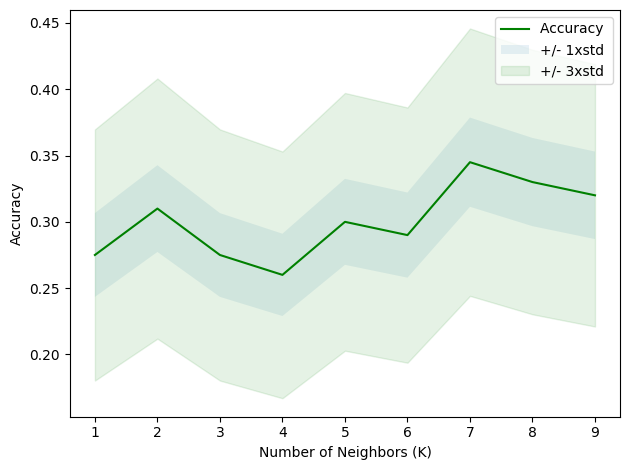

In [81]:
plt.plot(range(1, ks), mean_acc, 'g')
plt.fill_between(range(1, ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10 )
plt.fill_between(range(1, ks), mean_acc -3 * std_acc, mean_acc + 3 * std_acc, alpha = 0.10, color = 'green')
plt.legend(('Accuracy ', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()


In [82]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.345 with k= 7
